In [4]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
plt.rcParams['figure.figsize'] = [8, 8]
from tqdm import tqdm

# Homoscedastic sigma

In [5]:
N = 10
s = 0.2
dist_init = norm(1 , s)

In [6]:
fake_m = dist_init.rvs(N) #fake measurement as estimate of the true distribution

100%|██████████| 10/10 [00:00<00:00, 74.46it/s]


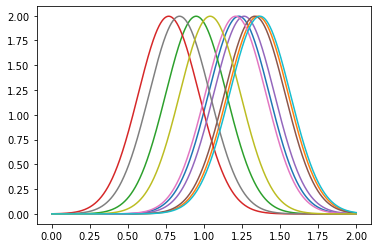

In [7]:
for i in tqdm(range(N)):
    dist = norm(fake_m[i], s)
    x = np.linspace(0, 2, 1000)
    plt.plot(x, dist.pdf(x))


In [8]:
def L_gauss(mu, x, s): #Likelihoods of the measurements
    return (1/(s*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/s)**2)

1.135135135135135 1.135203898916386


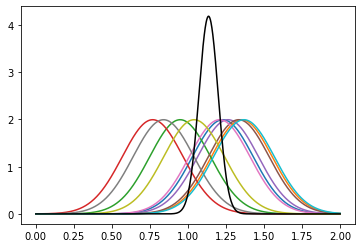

In [9]:
mu = np.linspace(0,2,1000)
L_gauss_product = []

for i in range(1000):
    L_gauss_product.append(1)

for i in range(N):
    plt.plot(mu, L_gauss(mu, fake_m[i], s))
    L_gauss_product = L_gauss_product * L_gauss(mu, fake_m[i], s)

plt.plot(mu, L_gauss_product, 'black')

ML = mu[np.argsort(L_gauss_product)[-1]]
MLE = np.mean(fake_m)

print(ML, MLE) #comparing Maximum Likelihood and ML Estimator

In [10]:
L_diff = np.diff(np.log(L_gauss_product), 2)
print(L_diff)

[-0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002 -0.001002
 -0.00

In [11]:
L_diff_norm = -1 * (L_diff/(mu[1]-mu[0])**2)
err = (1/np.sqrt(L_diff_norm))[np.argsort(L_gauss_product)[-1]]
print(err, s/np.sqrt(N)) #comparing the Fisher matrix with the error estimator

0.06324555320338905 0.06324555320336758


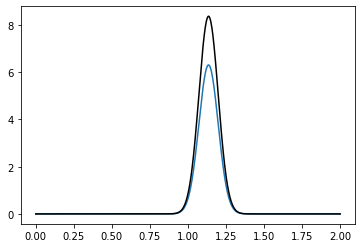

In [13]:
plt.plot(mu, norm.pdf(mu, ML, err))
plt.plot(mu, 2*L_gauss_product, 'black')

# Heteroscedastic sigma

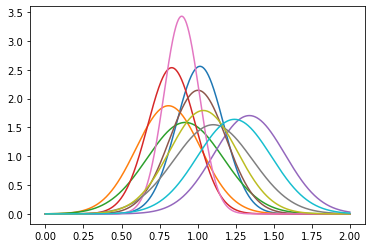

In [14]:
N = 10
sigma = norm(0.2, 0.05).rvs(N) 
fake_m = np.zeros(shape = N)
for i, s in zip(range(N), sigma):    
    fake_m[i] = norm(1, s).rvs()
    dist = norm(fake_m[i], s)
    x = np.linspace(0, 2, 1000)
    plt.plot(x, dist.pdf(x))

0.9769769769769769 0.9768683930539396


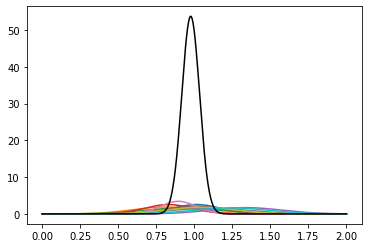

In [15]:
def L_gauss(mu, x, s):
    return (1/(s*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/s)**2)

mu = np.linspace(0,2,1000)
L_gauss_product = []

for i in range(1000):
    L_gauss_product.append(1)

for i, s in zip(range(N), sigma):
    plt.plot(mu, L_gauss(mu, fake_m[i], s))
    L_gauss_product = L_gauss_product * L_gauss(mu, fake_m[i], s)

plt.plot(mu, L_gauss_product, 'black')

ML = mu[np.argsort(L_gauss_product)[-1]]
MLE = np.sum(fake_m/(sigma**2))/np.sum(1/(sigma**2))

print(ML, MLE)

In [16]:
L_diff = np.diff(np.log(L_gauss_product), 2)
L_diff_norm = -1 * (L_diff/(mu[1]-mu[0])**2)
err = (1/np.sqrt(L_diff_norm))[np.argsort(L_gauss_product)[-1]]
print(err, (np.sum(1/(sigma**2)))**(-1/2))

0.058488401190389595 0.05848840119039467


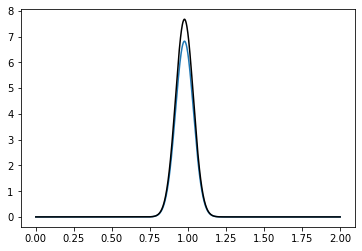

In [23]:
plt.plot(mu, norm.pdf(mu, ML, err))
plt.plot(mu, (1/7)*L_gauss_product, 'black')